In [1]:
%pylab inline
import time
import numpy as np
import matplotlib.pyplot as plt
from utils import img_utils
import seaborn as sns
import utils.math_utils as mu

Populating the interactive namespace from numpy and matplotlib


In [52]:
def print_results(t_snr=25):
    base_folder = './resultados/'

    print '==[Tsnr=%s] =='%str(t_snr)
    
    optimal_vals = np.load(base_folder+ 'optimal_vals/optimal_vals_Tsnr' + str(t_snr) + '.npy')
    print 'optimal_vals_mean=', np.array(optimal_vals).mean()
    print 'optimal_vals_std=', np.std(optimal_vals)
    print
    
    times = np.load(base_folder+ 'times/times_Tsnr' + str(t_snr) + '.npy')
    sec = np.array(times).mean()
    print 'times_mean=', int(sec/60), "'", int(sec%60),'"'
    print 'times_std=', np.std(times)
    print
    
    Yhr_norms = np.load(base_folder+ 'Yhr_norms/Yhr_norms_Tsnr' + str(t_snr) + '.npy')
    print 'Yhr_norm_mean=', np.array(Yhr_norms).mean()
    print 'Yhr_norm_std=', np.std(Yhr_norms)
    print

    Ylr_norms = np.load(base_folder+ 'Ylr_norms/Ylr_norms_Tsnr' + str(t_snr) + '.npy')
    print 'Ylr_norm_mean=', np.array(Ylr_norms).mean()
    print 'Ylr_norm_std=', np.std(Ylr_norms)
    print

    dif_norms = np.load(base_folder+ 'dif_norms/dif_norms_Tsnr' + str(t_snr) + '.npy')
    print 'dif_norms_mean=', np.array(dif_norms).mean()
    print 'dif_norms_std=', np.std(dif_norms)
    print
    
    return Yhr_norms, Ylr_norms, dif_norms, optimal_vals, times


In [74]:
Yhr_norms, Ylr_norms, dif_norms, optimal_vals, times = print_results(t_snr=75)

print 'optimal_vals', optimal_vals
print 'i_hr', np.linalg.norm(i_hr)
print 'Yhr_norms' , Yhr_norms

print 'i_lr', np.linalg.norm(i_lr)
print 'Ylr_norms' , Ylr_norms
print 'dif_norms', dif_norms

==[Tsnr=75] ==
optimal_vals_mean= 3062.95373388
optimal_vals_std= 540.415079249

times_mean= 5 ' 33 "
times_std= 34.6419429125

Yhr_norm_mean= 17948.640358
Yhr_norm_std= 38.36827582

Ylr_norm_mean= 6441.36604292
Ylr_norm_std= 21.6735968918

dif_norms_mean= 653.144766334
dif_norms_std= 6.28913529796

optimal_vals [ 4097.23608713  3092.27965803  2786.66426973  2710.34897658  2628.23967792]
i_hr 18093.7347444
Yhr_norms [ 18024.76248893  17928.51011617  17938.0135442   17929.03136087
  17922.88428   ]
i_lr 6425.75513072
Ylr_norms [ 6484.27244243  6434.36435376  6433.35473982  6429.08354788  6425.75513072]
dif_norms [ 640.76778015  656.47696223  654.31025849  656.35203708  657.81679372]


In [53]:
Yhr_norms, Ylr_norms, dif_norms, optimal_vals, times = print_results(t_snr=float('inf'))
dif_norms

==[Tsnr=inf] ==
optimal_vals_mean= 3034.28053525
optimal_vals_std= 494.9482911

times_mean= 5 ' 7 "
times_std= 1.49111612789

Yhr_norm_mean= 17908.0053546
Yhr_norm_std= 16.4625900104

Ylr_norm_mean= 6427.99025333
Ylr_norm_std= 4.87548911547

dif_norms_mean= 859.403717655
dif_norms_std= 3.25286506126



array([ 864.65224888,  856.39767267,  861.77165482,  856.88977091,
        857.307241  ])

In [98]:
VMIN, VMAX = 0,408
np.linalg.norm(i_hr)

18093.734744380443

# Calculando MSE 

In [75]:
# Tomo los pedazos utilizados (original y sub muestrado de input)
i_hr = np.load('./resultados/i_hr.npy')
i_lr = np.load('./resultados/i_lr.npy')

# Tomo el resultado del realce
base_folder = './resultados/reconstruc/'
name = 'A_Tsnr%d_lrsnr%d.npy'% (75, 75)
A = np.load(base_folder+ name)

In [79]:
mse_img = mu.mse(i_hr, A,axis=3)
mse_img.min(), mse_img.max()

(1.3366594149819726, 202.25197009947843)

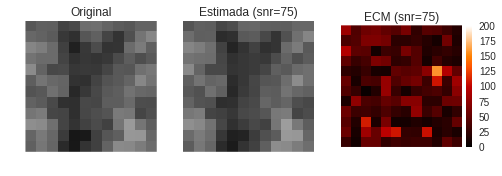

In [94]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
reload(img_utils)


SNR = 75
titles = ['Original', 'Estimada (snr='+str(SNR)+')',  'ECM (snr='+str(SNR)+')']
plt, _, _, im3 = img_utils._isc3(i_hr, A, mse_img, b=0,titles=titles, vmin=VMIN, vmax=VMAX)
#plt.set_cmap('afmhot')
#plt.clim(200)
#plt.colorbar(im3)
divider = make_axes_locatable(im3.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax)
plt.savefig('/user/lgomez/home/Documents/tesis/optimizacion/img/mse_snr50_voxels_b1_cmp.pdf')


# Idem pero para el coef. de det.

In [95]:
cdet_img = mu.coef_det_by_voxel_skl(i_hr, A)
cdet_img.min(), cdet_img.max()

(-1.4508125767855646, 0.99951470894140404)

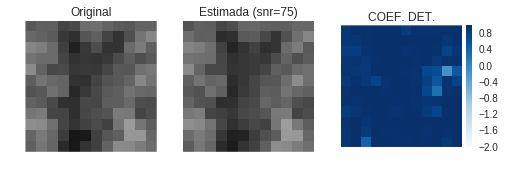

In [97]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
reload(img_utils)
SNR = 75
titles = ['Original', 'Estimada (snr='+str(SNR)+')',  'COEF. DET.']
plt, _, _, im3 = img_utils._isc3(i_hr, A, cdet_img, b=0,titles=titles, vmin=VMIN, vmax=VMAX)
#plt.set_cmap('afmhot')
#plt.clim(200)
#plt.colorbar(im3)
divider = make_axes_locatable(im3.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax)
#plt.savefig('/user/lgomez/home/Documents/tesis/optimizacion/img/cdet_snr50_voxels_b1_cmp.pdf')


A_Tsnr25_lrsnr25.npy 408.1112754 295.0 291.0 407.0 312.0 347.0 397.0


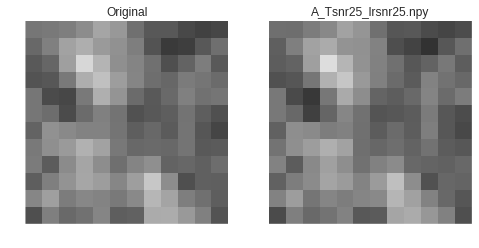

In [71]:
print name, A.max(), i_hr[:,:,:,0].max(), i_hr[:,:,:,1].max(), i_hr[:,:,:,2].max(), i_hr[:,:,:,3].max(), i_hr[:,:,:,4].max(), i_hr[:,:,:,5].max() 
plt = img_utils._isc(i_hr,A,b=2, titles=['Original', name], vmax=VMAX)

## Save all coronal slice from all result (une gradient only)

(2.5302733194397948, 408.11127540010409)

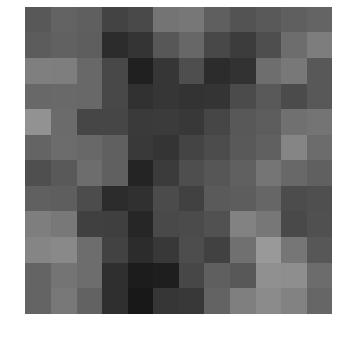

In [73]:
base_folder = './resultados/reconstruc/'
Tsnrs = [25, 50, 75, 100, 200, float('inf')]
LRsnrs = [25, 50, 75, 100, float('inf')]

gradient=0
maxs =[]
mins =[]
for tsnr in Tsnrs :
    for lrsnr in LRsnrs :
        name = 'A_Tsnr%s_lrsnr%s'% (str(tsnr), str(lrsnr))
        A = np.load(base_folder + name + '.npy')
        maxs.append(A.max())
        mins.append(A.min())
        res=img_utils._is(A, b=gradient, vmin=VMIN, vmax=VMAX)
        res.savefig(base_folder +'img/' + name + '_G'+str(gradient))

np.array(mins).min() , np.array(maxs).max()        

<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

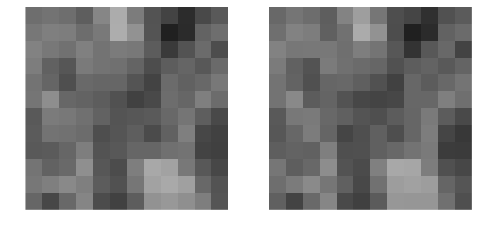

In [64]:
img_utils._isc(i_hr, A, b=4, vmax=410)